In [5]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [6]:
# print(bc.DESCR)

# dataset info

In [7]:

bc.target[0] , bc.target[440]

(0, 1)

In [8]:

bc.target.shape

(569,)

In [9]:
bc.data[20]

array([1.308e+01, 1.571e+01, 8.563e+01, 5.200e+02, 1.075e-01, 1.270e-01,
       4.568e-02, 3.110e-02, 1.967e-01, 6.811e-02, 1.852e-01, 7.477e-01,
       1.383e+00, 1.467e+01, 4.097e-03, 1.898e-02, 1.698e-02, 6.490e-03,
       1.678e-02, 2.425e-03, 1.450e+01, 2.049e+01, 9.609e+01, 6.305e+02,
       1.312e-01, 2.776e-01, 1.890e-01, 7.283e-02, 3.184e-01, 8.183e-02])

# Preprocessing

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test , y_train , y_test = train_test_split(bc.data , bc.target ,test_size = 0.2)

In [11]:
print(f"Feature => train : {x_train.shape} - test: {x_test.shape}")
print(f"Label => train : {y_train.shape} - test: {y_test.shape}")

Feature => train : (455, 30) - test: (114, 30)
Label => train : (455,) - test: (114,)


In [12]:
x_train[0]

array([1.396e+01, 1.705e+01, 9.143e+01, 6.024e+02, 1.096e-01, 1.279e-01,
       9.789e-02, 5.246e-02, 1.908e-01, 6.130e-02, 4.250e-01, 8.098e-01,
       2.563e+00, 3.574e+01, 6.351e-03, 2.679e-02, 3.119e-02, 1.342e-02,
       2.062e-02, 2.695e-03, 1.639e+01, 2.207e+01, 1.081e+02, 8.260e+02,
       1.512e-01, 3.262e-01, 3.209e-01, 1.374e-01, 3.068e-01, 7.957e-02])

In [13]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0 , 1))

x_train = scalar.fit_transform(x_train)

x_test = scalar.transform(x_test)

In [14]:
x_train[0]

array([0.33030432, 0.24822455, 0.32921014, 0.19465536, 0.51430893,
       0.33286301, 0.22957317, 0.27422896, 0.45937161, 0.24765233,
       0.11352526, 0.09936351, 0.08509636, 0.05404951, 0.15766394,
       0.23560702, 0.07876263, 0.25421481, 0.17923679, 0.06219339,
       0.30096051, 0.26785714, 0.28731511, 0.15749115, 0.52849501,
       0.29000398, 0.29040724, 0.47216495, 0.35709195, 0.16089466])

# Classification

In [15]:
from sklearn.metrics import accuracy_score , precision_score , recall_score

def calculate_metrics(y_train , y_test , y_pred_train , y_pred_test):
              acc_train = accuracy_score(y_true= y_train , y_pred=y_pred_train)
              acc_test = accuracy_score(y_true=y_test , y_pred= y_pred_test)
              
              p = precision_score(y_true=y_test , y_pred=y_pred_test)
              r = recall_score(y_true=y_test , y_pred=y_pred_test)
              
              print(f"acc train : {acc_train} - acc test :{acc_test} - precision: {p} - recall:{r}")
              return acc_train , acc_test , p , r
              

# 1.Naive bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train , y_train)

GaussianNB()

In [17]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb , acc_test_gnb , p_gnb , r_gnb = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

acc train : 0.9362637362637363 - acc test :0.956140350877193 - precision: 0.961038961038961 - recall:0.9736842105263158


# knn

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8 , algorithm= 'kd_tree' , leaf_size= 28)
knn.fit(x_train , y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [19]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn , acc_test_knn , p_knn , r_knn = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

acc train : 0.9714285714285714 - acc test :0.9824561403508771 - precision: 0.9868421052631579 - recall:0.9868421052631579


# 3. Decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier(max_depth = 64 , min_samples_split= 2 , criterion= 'gini')
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=64)

In [21]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt , acc_test_dt , p_dt , r_dt = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

acc train : 1.0 - acc test :0.9824561403508771 - precision: 1.0 - recall:0.9736842105263158


# 4. Random Forest 

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500 , max_depth=64 , min_samples_split=8)
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [23]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf , acc_test_rf , p_rf , r_rf = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

acc train : 0.9934065934065934 - acc test :0.9824561403508771 - precision: 0.9743589743589743 - recall:1.0


# 5. SVM

In [24]:
from sklearn import svm
sv = svm.SVC(kernel='poly')
sv.fit(x_train , y_train)

SVC(kernel='poly')

In [25]:
y_pred_train = sv.predict(x_train)
y_pred_test = sv.predict(x_test)

acc_train_sv , acc_test_sv , p_sv , r_sv = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

acc train : 0.9868131868131869 - acc test :0.956140350877193 - precision: 0.961038961038961 - recall:0.9736842105263158


## 6. Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)


LogisticRegression()

In [28]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr , acc_test_lr , p_lr , r_lr = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

acc train : 0.9736263736263736 - acc test :0.9824561403508771 - precision: 0.9868421052631579 - recall:0.9868421052631579


# 7.ANN

In [40]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=256 ,activation='relu', solver='adam' , batch_size=64)
ann.fit(x_train,y_train)

c:\Users\zar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [41]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)
acc_train_ann , acc_test_ann , p_ann , r_ann = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

acc train : 0.989010989010989 - acc test :0.9649122807017544 - precision: 0.9864864864864865 - recall:0.9605263157894737


# Comparison

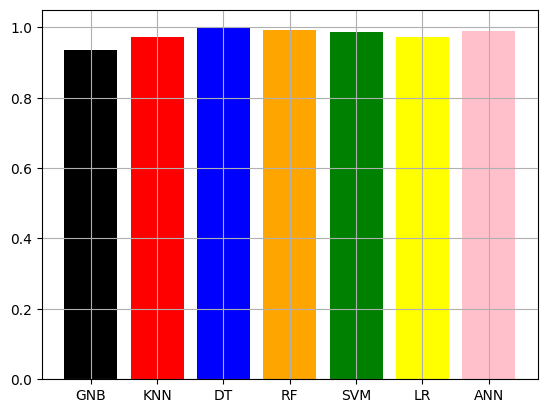

In [51]:
import matplotlib.pyplot as plt
acc_train = [acc_train_gnb,acc_train_knn,acc_train_dt ,acc_train_rf ,acc_train_sv , acc_train_lr ,acc_train_ann]
title = ["GNB" , 'KNN' ,'DT','RF','SVM','LR','ANN']
colors = ['black','red' , 'blue' , 'orange' , 'green' , 'yellow' , 'pink']
plt.bar(title ,acc_train , color= colors)
plt.grid()
plt.show()


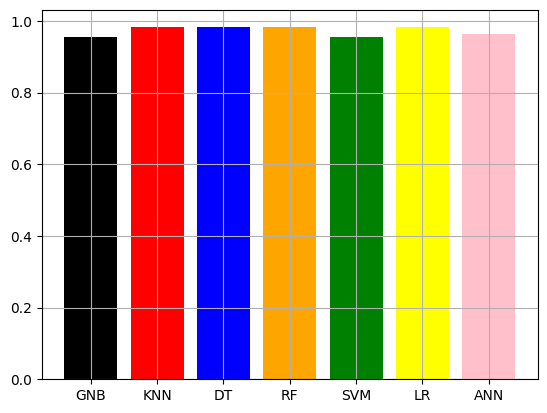

In [52]:
acc_test = [acc_test_gnb,acc_test_knn,acc_test_dt ,acc_test_rf ,acc_test_sv , acc_test_lr ,acc_test_ann]
title = ["GNB" , 'KNN' ,'DT','RF','SVM','LR','ANN']
colors = ['black','red' , 'blue' , 'orange' , 'green' , 'yellow' , 'pink']
plt.bar(title ,acc_test , color= colors)
plt.grid()
plt.show()

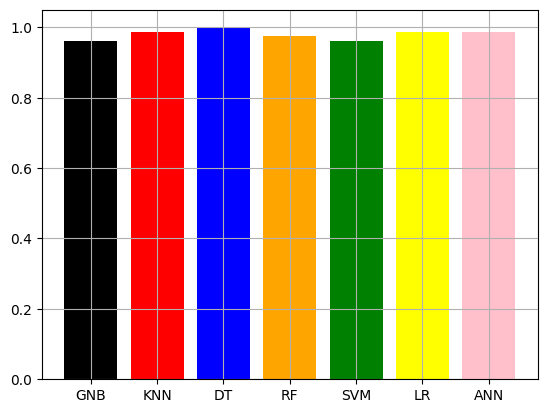

In [54]:
p = [p_gnb,p_knn,p_dt ,p_rf ,p_sv , p_lr ,p_ann]
title = ["GNB" , 'KNN' ,'DT','RF','SVM','LR','ANN']
colors = ['black','red' , 'blue' , 'orange' , 'green' , 'yellow' , 'pink']
plt.bar(title ,p , color= colors)
plt.grid()
plt.show()

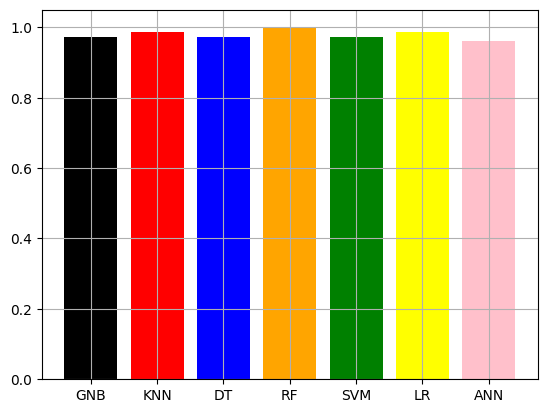

In [55]:
r = [r_gnb,r_knn,r_dt ,r_rf ,r_sv , r_lr ,r_ann]
title = ["GNB" , 'KNN' ,'DT','RF','SVM','LR','ANN']
colors = ['black','red' , 'blue' , 'orange' , 'green' , 'yellow' , 'pink']
plt.bar(title , r , color= colors)
plt.grid()
plt.show()